In [12]:
from datasets import load_dataset

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [73]:
import ast

In [16]:
from matplotlib import pyplot as plt

In [17]:
dataset = load_dataset('lukebarousse/data_jobs')

In [18]:
dataframe = dataset['train'].to_pandas()

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [20]:
dataframe[['job_title_short','salary_year_avg','job_country']].sort_values(by='salary_year_avg')[(dataframe.salary_year_avg != 'NaN') & (dataframe.salary_year_avg > 100000) & (dataframe.job_country == 'Sudan' )]                                                             

/tmp/ipykernel_6225/2487221530.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe[['job_title_short','salary_year_avg','job_country']].sort_values(by='salary_year_avg')[(dataframe.salary_year_avg != 'NaN') & (dataframe.salary_year_avg > 100000) & (dataframe.job_country == 'Sudan' )]


,job_title_short,salary_year_avg,job_country
541552,Data Analyst,100450.000000,Sudan
771454,Data Analyst,100500.000000,Sudan
174768,Data Scientist,100728.578125,Sudan
317978,Data Scientist,100783.000000,Sudan
421287,Data Scientist,100783.000000,Sudan
...,...,...,...
65724,Senior Data Analyst,375000.000000,Sudan
428547,Data Engineer,390000.000000,Sudan
669400,Senior Data Engineer,425000.000000,Sudan
673388,Data Engineer,450000.000000,Sudan


In [21]:
dataAnalystSalary = dataframe['salary_year_avg'][(dataframe.job_title_short == 'Data Analyst')&(dataframe.salary_year_avg != 'NaN')]

In [22]:
dataAnalystSalary.dropna(axis=0).head(10)

109      89000.00
180      90250.00
410     133285.00
988      62623.00
1413     71300.00
1490     43200.00
1555    111175.00
1587     89111.75
1681    111175.00
1684    120000.00
Name: salary_year_avg, dtype: float64

In [23]:
np.nanmean(dataAnalystSalary)

np.float64(93841.90785449345)

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [25]:
dataframe.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [26]:
for i,d in enumerate(dataframe.job_title_short.unique()):
    print(i+1, d)

1 Senior Data Engineer
2 Data Analyst
3 Data Engineer
4 Business Analyst
5 Data Scientist
6 Machine Learning Engineer
7 Senior Data Analyst
8 Cloud Engineer
9 Senior Data Scientist
10 Software Engineer


In [27]:
(dataframe['job_title_short'][dataframe.job_title_short == 'Data Analyst']).describe()

count           196075
unique               1
top       Data Analyst
freq            196075
Name: job_title_short, dtype: object

In [28]:
dataframe.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [29]:
dataframe.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [31]:
type(dataframe.job_posted_date[0])

str

In [32]:
pd.to_datetime(dataframe.job_posted_date)

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [34]:
dataframe['job_posted_date'] = pd.to_datetime(dataframe.job_posted_date)

In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [36]:
dataframe.job_posted_date.dt.year

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
785736    2023
785737    2023
785738    2023
785739    2023
785740    2023
Name: job_posted_date, Length: 785741, dtype: int32

In [37]:
dataframe['job_posted_date_year'] = dataframe.job_posted_date.dt.year

In [38]:
dataframe.sort_values(by='job_posted_date',ascending=True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
108804,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:04,False,False,United States,None,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',...",2023
96906,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:07,True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq...",2023
98438,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:22,False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud...",2023
110290,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:24,False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}",2023
72158,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",2023-01-01 00:00:27,False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362129,Data Engineer,Data engineer,"Sunnyvale, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,True,False,Sudan,None,NaN,NaN,ITCO Solutions,"['sql', 'python', 'java', 'snowflake', 'airflo...","{'cloud': ['snowflake'], 'libraries': ['airflo...",2023
351830,Data Engineer,Data engineer,"San Francisco, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,False,False,Sudan,None,NaN,NaN,JBL Resources,"['azure', 'power bi', 'word']","{'analyst_tools': ['power bi', 'word'], 'cloud...",2023
327439,Data Engineer,Staff engineer data,"Southfield, MI",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:32,False,False,Sudan,year,140000.0,NaN,Credit Acceptance,"['express', 'kubernetes']","{'other': ['kubernetes'], 'webframeworks': ['e...",2023
112373,Senior Data Analyst,Marketing Data & Analytics Product Owner - Sen...,"Boston, MA (+1 other)",via Boston Consulting Group,Full-time,False,"New York, United States",2023-12-31 23:59:58,False,False,United States,None,NaN,NaN,Boston Consulting Group,"['sql', 'python', 'r', 'gdpr', 'tableau', 'pow...","{'analyst_tools': ['tableau', 'power bi'], 'li...",2023


In [39]:
dataframe.dropna(subset='salary_year_avg')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",2023
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2023
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",2023
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",2023


In [40]:
for i in dataframe.job_posted_date_year:
    if i == 2023:
        i = random.randrange(2016,2025)
        
dataframe[['job_title_short','job_posted_date_year','salary_year_avg']]

,job_title_short,job_posted_date_year,salary_year_avg
0,Senior Data Engineer,2023,NaN
1,Data Analyst,2023,NaN
2,Data Engineer,2023,NaN
3,Data Engineer,2023,NaN
4,Data Engineer,2023,NaN
...,...,...,...
785736,Software Engineer,2023,NaN
785737,Data Analyst,2023,NaN
785738,Business Analyst,2023,NaN
785739,Data Engineer,2023,NaN


In [41]:
dataframe.dropna(subset=['salary_year_avg'])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",2023
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2023
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",2023
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",2023


In [42]:
dataframe.describe()

,job_posted_date,salary_year_avg,salary_hour_avg,job_posted_date_year
count,785741,22003.000000,10662.000000,785741.0
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598,2023.0
min,2023-01-01 00:00:04,15000.000000,8.000000,2023.0
25%,2023-03-20 10:05:48,90000.000000,27.500000,2023.0
50%,2023-06-29 06:11:38,115000.000000,45.980000,2023.0
75%,2023-09-27 01:01:16,150000.000000,61.159996,2023.0
max,2023-12-31 23:59:58,960000.000000,391.000000,2023.0
std,NaN,48312.449482,21.890738,0.0


In [43]:
# dataframe.dropna(subset='salary_year_avg',inplace= True)

In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [46]:
dataframe.describe()

,job_posted_date,salary_year_avg,salary_hour_avg,job_posted_date_year
count,785741,22003.000000,10662.000000,785741.0
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598,2023.0
min,2023-01-01 00:00:04,15000.000000,8.000000,2023.0
25%,2023-03-20 10:05:48,90000.000000,27.500000,2023.0
50%,2023-06-29 06:11:38,115000.000000,45.980000,2023.0
75%,2023-09-27 01:01:16,150000.000000,61.159996,2023.0
max,2023-12-31 23:59:58,960000.000000,391.000000,2023.0
std,NaN,48312.449482,21.890738,0.0


In [47]:
dataframe['salary_year_avg'].min()

np.float64(15000.0)

In [48]:
min_salary = dataframe.salary_year_avg.min()

In [49]:
int(min_salary)

15000

In [50]:
dataframe.iloc[int(min_salary)]

job_title_short                                               Data Analyst
job_title                        Alternant Data Analyst/Scientist/Engineer
job_location                                                  Rezé, France
job_via                                                         via Indeed
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     France
job_posted_date                                        2023-08-01 13:27:55
job_no_degree_mention                                                False
job_health_insurance                                                 False
job_country                                                         France
salary_rate                                                           None
salary_year_avg                                                        NaN
salary_hour_avg          

In [51]:
dataframe['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [52]:
for i in dataframe['job_title_short'].value_counts():
    print(i)

196075
186241
172286
49063
44929
44563
36957
29216
14080
12331


In [53]:
dataframe.groupby('job_title_short')[['salary_year_avg','salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [54]:
dataframe.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median'])

,min,max,median
job_title_short,,,
Business Analyst,16500.0,387460.0,85000.0
Cloud Engineer,42000.0,280000.0,90000.0
Data Analyst,25000.0,650000.0,90000.0
Data Engineer,15000.0,525000.0,125000.0
Data Scientist,27000.0,960000.0,127500.0
Machine Learning Engineer,30000.0,325000.0,106415.0
Senior Data Analyst,30000.0,425000.0,111175.0
Senior Data Engineer,35000.0,425000.0,147500.0
Senior Data Scientist,45000.0,890000.0,155500.0


In [55]:
sudan_jobs = dataframe[dataframe['job_country'] == 'Sudan']
sudan_jobs = sudan_jobs[sudan_jobs['salary_year_avg'].notna()]
sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median'])
sudan_jobs_salary_scale = sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median']).sort_values('median')
sudan_jobs_salary_scale

,min,max,median
job_title_short,,,
Cloud Engineer,58000.5,82830.0,70415.25
Business Analyst,50282.0,121500.0,82665.00
Data Analyst,40000.0,190000.0,87500.00
Software Engineer,83897.0,205000.0,100000.00
Senior Data Analyst,65000.0,375000.0,111175.00
Data Engineer,25000.0,450000.0,127500.00
Data Scientist,32000.0,550000.0,130000.00
Senior Data Engineer,90000.0,425000.0,147500.00
Senior Data Scientist,79019.0,262500.0,155000.00


In [56]:
sudan_jobs.groupby('job_title_short')['salary_year_avg'].count()

job_title_short
Business Analyst              30
Cloud Engineer                 2
Data Analyst                 123
Data Engineer                501
Data Scientist               565
Machine Learning Engineer     16
Senior Data Analyst           27
Senior Data Engineer         161
Senior Data Scientist        179
Software Engineer             19
Name: salary_year_avg, dtype: int64

In [57]:
sudan_jobs.groupby('job_title_short')[['salary_year_avg']].agg(['min','max','median','count'])

salary_year_avg                           
                                      min       max     median count
job_title_short                                                     
Business Analyst                  50282.0  121500.0   82665.00    30
Cloud Engineer                    58000.5   82830.0   70415.25     2
Data Analyst                      40000.0  190000.0   87500.00   123
Data Engineer                     25000.0  450000.0  127500.00   501
Data Scientist                    32000.0  550000.0  130000.00   565
Machine Learning Engineer         85000.0  325000.0  165659.00    16
Senior Data Analyst               65000.0  375000.0  111175.00    27
Senior Data Engineer              90000.0  425000.0  147500.00   161
Senior Data Scientist             79019.0  262500.0  155000.00   179
Software Engineer                 83897.0  205000.0  100000.00    19

In [58]:
sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')

,min,max,median,count
job_title_short,,,,
Cloud Engineer,58000.5,82830.0,70415.25,2
Business Analyst,50282.0,121500.0,82665.00,30
Data Analyst,40000.0,190000.0,87500.00,123
Software Engineer,83897.0,205000.0,100000.00,19
Senior Data Analyst,65000.0,375000.0,111175.00,27
Data Engineer,25000.0,450000.0,127500.00,501
Data Scientist,32000.0,550000.0,130000.00,565
Senior Data Engineer,90000.0,425000.0,147500.00,161
Senior Data Scientist,79019.0,262500.0,155000.00,179


In [59]:
egypt_jobs = dataframe[(dataframe['job_country'] == 'Egypt')]

egypt_jobs = egypt_jobs[egypt_jobs['salary_year_avg'].notna()]

egypt_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')
egypt_jobs_salary_scale = egypt_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')
egypt_jobs_salary_scale

,min,max,median,count
job_title_short,,,,
Data Analyst,50400.0,75550.0,54257.00,4
Data Engineer,45000.0,147500.0,87986.50,6
Senior Data Scientist,79200.0,90670.0,88128.00,3
Senior Data Engineer,96773.0,96773.0,96773.00,1
Data Scientist,70000.0,157500.0,98554.75,4
Machine Learning Engineer,72000.0,166000.0,119000.00,2


In [60]:
sudan_jobs_salary_scale
egypt_jobs_salary_scale

,min,max,median,count
job_title_short,,,,
Data Analyst,50400.0,75550.0,54257.00,4
Data Engineer,45000.0,147500.0,87986.50,6
Senior Data Scientist,79200.0,90670.0,88128.00,3
Senior Data Engineer,96773.0,96773.0,96773.00,1
Data Scientist,70000.0,157500.0,98554.75,4
Machine Learning Engineer,72000.0,166000.0,119000.00,2


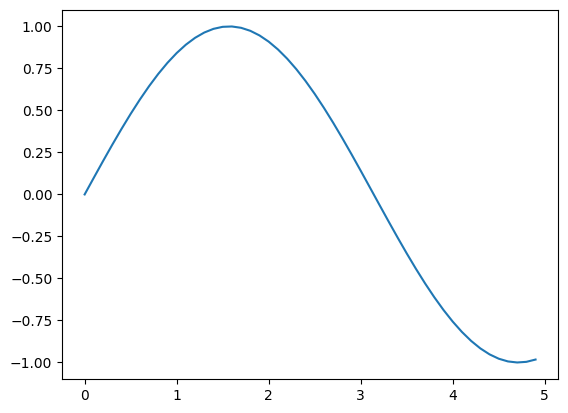

In [61]:
x = np.arange(0,5,0.1)
sinx = np.sin(x)
plt.plot(x,sinx)

In [62]:
count_monthly_jobs = dataframe.job_posted_month.value_counts().sort_index()
plt.plot(count_monthly_jobs.index,count_monthly_jobs.values)


AttributeError: 'DataFrame' object has no attribute 'job_posted_month'

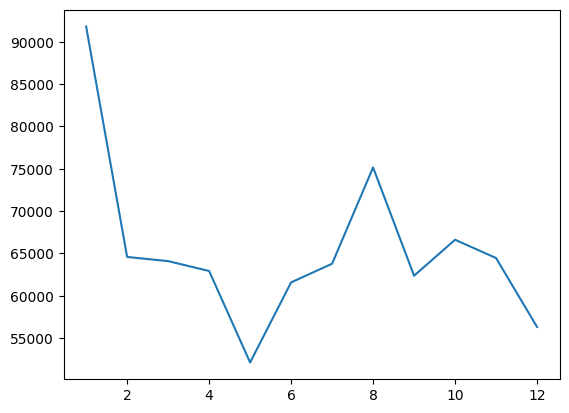

In [257]:
x = pd.Series(count_monthly_jobs.values,index=count_monthly_jobs.index)

plt.plot(x)

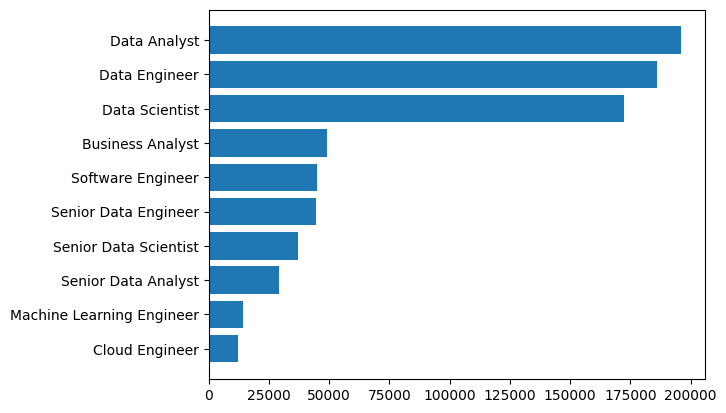

In [285]:
job_counts = dataframe.job_title_short.value_counts().sort_values(ascending=True)

plt.barh(job_counts.index,job_counts)
plt.show()

<BarContainer object of 10 artists>

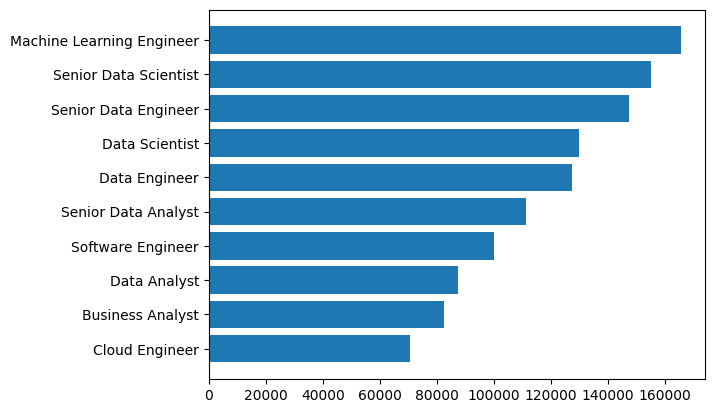

In [307]:
plt.barh(sudan_jobs_salary_scale.index,sudan_jobs_salary_scale['median'].sort_values(ascending=True))

<BarContainer object of 10 artists>

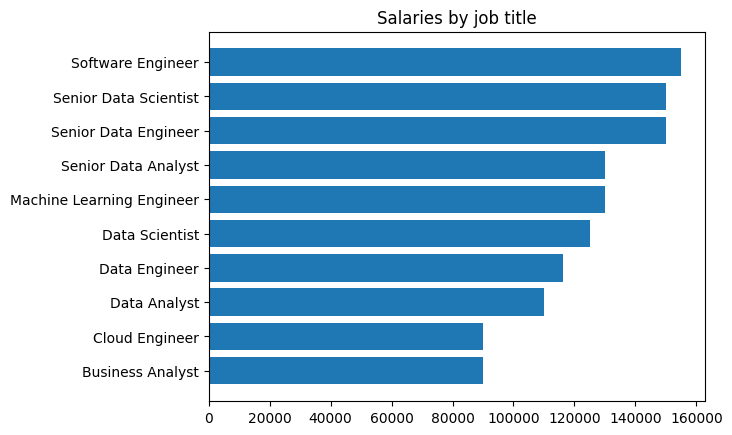

In [406]:
us_jobs = dataframe[dataframe['job_country'] == 'United States']
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]
us_jobs_salary_scale = us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count'])
plt.title('Salaries by job title')
plt.barh(us_jobs_salary_scale.index,us_jobs_salary_scale['median'].sort_values(ascending=True))


<BarContainer object of 10 artists>

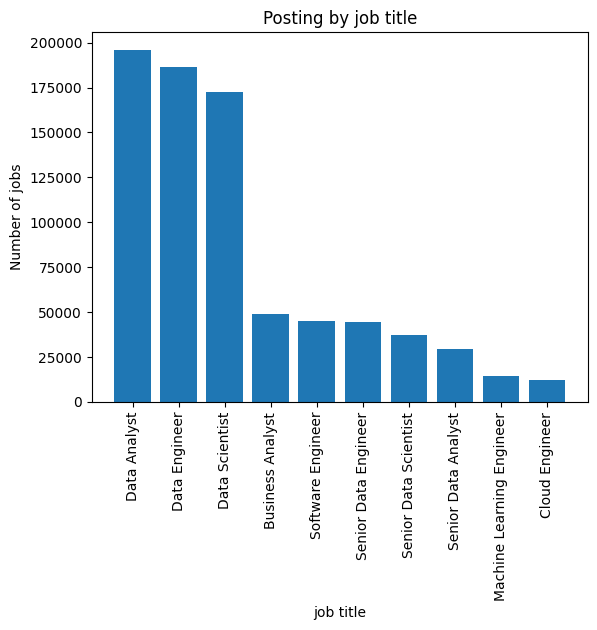

In [416]:
plt.title('Posting by job title')
plt.xlabel('job title')
plt.xticks(rotation=90)
plt.ylabel('Number of jobs')
plt.bar(job_counts.sort_values(ascending=False).)
index,job_counts.sort_values(ascending=False)

<BarContainer object of 10 artists>

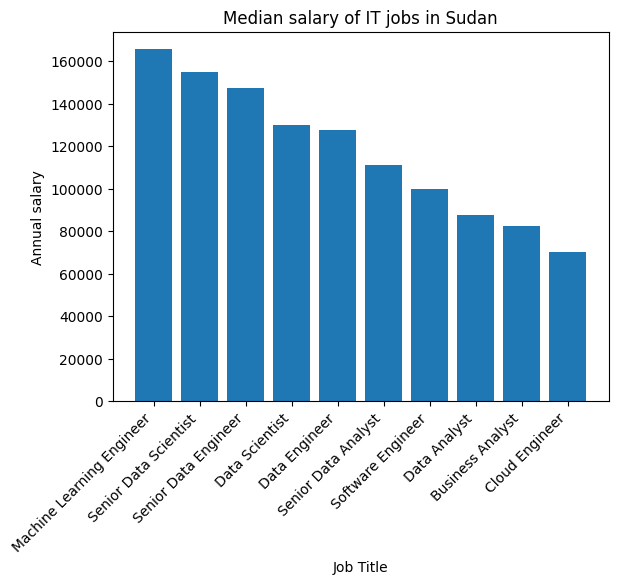

In [54]:
plt.title('Median salary of IT jobs in Sudan')
plt.xlabel('Job Title')
plt.ylabel('Annual salary')
plt.xticks(rotation=45,ha='right')
plt.bar(sudan_jobs_salary_scale['median'].sort_values(ascending=False).index,sudan_jobs_salary_scale['median'].sort_values(ascending=False))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Machine Learning Engineer'),
  Text(1, 0, 'Senior Data Scientist'),
  Text(2, 0, 'Senior Data Engineer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Senior Data Analyst'),
  Text(6, 0, 'Software Engineer'),
  Text(7, 0, 'Data Analyst'),
  Text(8, 0, 'Business Analyst'),
  Text(9, 0, 'Cloud Engineer')])

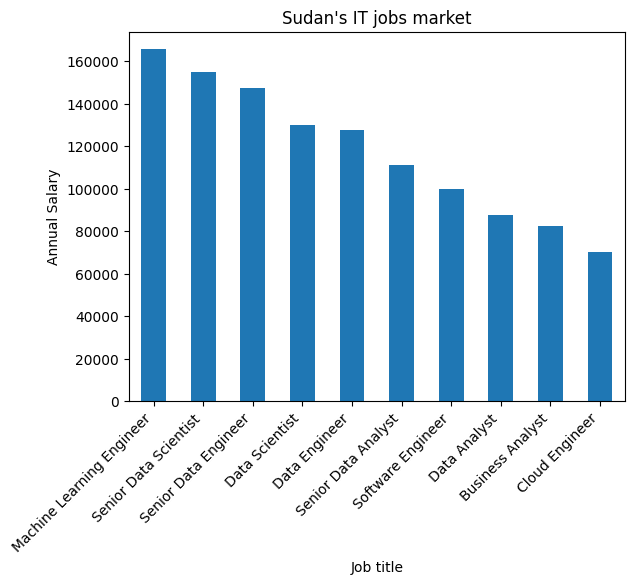

In [ ]:
sudan_median_salaries = sudan_jobs_salary_scale['median'].sort_values(ascending=False)
sudan_median_salaries.plot(kind='bar',title="Sudan's IT jobs market",xlabel='Job title',ylabel='Annual Salary')
plt.xticks(rotation=45,ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Machine Learning Engineer'),
  Text(1, 0, 'Senior Data Scientist'),
  Text(2, 0, 'Senior Data Engineer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Senior Data Analyst'),
  Text(6, 0, 'Software Engineer'),
  Text(7, 0, 'Data Analyst'),
  Text(8, 0, 'Business Analyst'),
  Text(9, 0, 'Cloud Engineer')])

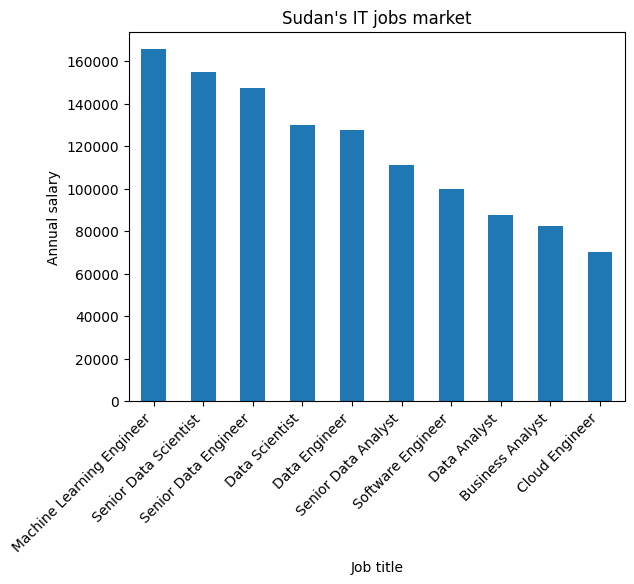

In [74]:
sudan_median_salaries = sudan_jobs_salary_scale['median'].sort_values(ascending=False)
sudan_median_salaries.plot(x=sudan_median_salaries.index,y=sudan_median_salaries,kind='bar')
plt.title("Sudan's IT jobs market")
plt.xlabel('Job title')
plt.ylabel('Annual salary')
plt.xticks(rotation=45,ha='right')

In [106]:
median_salary = dataframe.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
median_salary


job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64